# Linear Regression in R
This notebook demonstrates a simple linear regression analysis using R to model Salary based on Years of Experience. The ggplot2 automatically calculates the y-intercept, slope, correlation coefficient, and mean squared error values for the predicted model.

Slope = 8285.292099903527

Expected increase in salary after 1 year of additional experience.

y-intercept = 29203.52267124022

Expected salary at 0 years of experience.

R-squared = 0.785

Proportion of variation in years of experience that is predictable based on salary (i.e. 78.5% of variation in years of experience is predictable by salary).

MSE = 17523844.08

Average squared difference between the estimated (regression line) and actual (data points) values of the data set.


In [2]:
# Install missing packages
required_packages <- c("readr", "ggplot2", "dplyr", "ggrepel")

for (pkg in required_packages) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
  }
}

# Load libraries
library(readr)
library(ggplot2)
library(dplyr)
library(ggrepel)

Install R packages and load libraries required for the script to run.

In [3]:
# Define inputs
filename <- "regression_data.csv"
x_col <- "YearsExperience"
y_col <- "Salary"

# Load data
if (!file.exists(filename)) {
  stop(sprintf("Error: File '%s' not found.", filename))
}

data <- read_csv(filename, show_col_types = FALSE)
colnames(data) <- trimws(colnames(data))

# Check column validity
if (!(x_col %in% names(data)) || !(y_col %in% names(data))) {
  stop(sprintf("Column '%s' or '%s' not found. Available columns: %s",
               x_col, y_col, paste(names(data), collapse = ", ")))
}

Instruct the script which file to read. Loads a CSV file into a data frame.

In [4]:
# Fit linear regression model
formula <- as.formula(paste(y_col, "~", x_col))
model <- lm(formula, data = data)
predictions <- predict(model, newdata = data)

# Extract stats
slope <- coef(model)[[2]]
intercept <- coef(model)[[1]]
r_squared <- summary(model)$r.squared
mse <- mean((data[[y_col]] - predictions)^2)

# Print results
cat("Linear Regression Results:\n")
cat(sprintf("Slope = %.4f\n", slope))
cat(sprintf("y-intercept = %.4f\n", intercept))
cat(sprintf("R-squared = %.3f\n", r_squared))
cat(sprintf("MSE = %.2f\n", mse))

Linear Regression Results:
Slope = 8285.2921
y-intercept = 29203.5227
R-squared = 0.785
MSE = 17523844.08


Fits a linear regression model to the data. Prints the slope, intercept, correlation coeeficient, and mean squared error to the terminal.

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


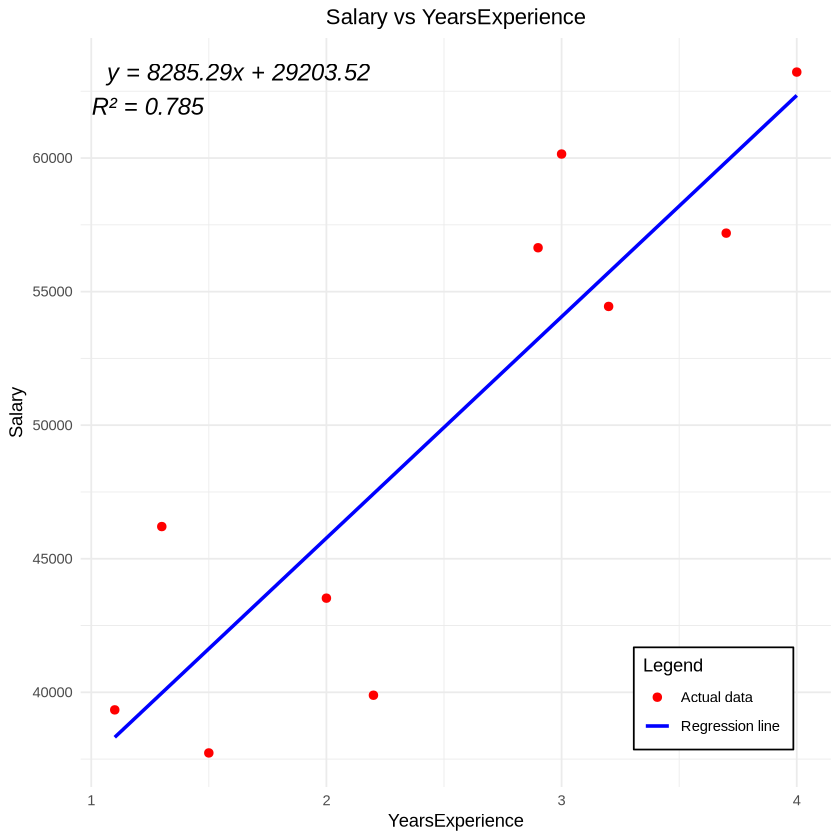

In [5]:
# Prepare data for plotting
plot_data <- data %>%
  mutate(Predicted = predictions)

# Create annotation text
equation <- sprintf("y = %.2fx + %.2f", slope, intercept)
r2_text <- sprintf("R² = %.3f", r_squared)
annotation_text <- paste(equation, r2_text, sep = "\n")

# Create plot
p <- ggplot(plot_data, aes_string(x = x_col, y = y_col)) +
  geom_point(aes(color = "Actual data"), size = 2) +
  geom_line(aes_string(y = "Predicted", color = shQuote("Regression line")), size = 1) +
  scale_color_manual(values = c("Actual data" = "red", "Regression line" = "blue")) +
  annotate("text", x = -Inf, y = Inf, label = annotation_text,
           hjust = -0.1, vjust = 1.5, size = 5, fontface = "italic",
           color = "black", parse = FALSE) +
  labs(
    title = paste(y_col, "vs", x_col),
    x = x_col,
    y = y_col,
    color = "Legend"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = c(0.95, 0.05),
    legend.justification = c(1, 0),
    legend.background = element_rect(fill = "white", color = "black")
  )

# Save and display plot
ggsave("regression_plot_r.png", plot = p, width = 8, height = 6, dpi = 300)
print(p)

Creates a scatter plot of the data and save it as a PNG output file.